## __RMSprop__
- A problem with AdaGrad is that it can slow the search down too much, resulting in very small learning rates for each parameter or dimension of the search by the end of the run.

- This has the effect of stopping the search too soon before the minimum can be located.

- It is an extension of AdaGrad, which uses a decaying average or moving average of the partial derivatives instead of the sum in the calculation of
the learning rate for each parameter.
- This is achieved by adding a new hyperparameter called rho that acts like momentum for the partial derivatives.
- Using a decaying moving average of the partial derivative allows the search to forget early partial derivative values and focus on the most recently seen shape of the search space.

## Steps to Be Followed:
1. Importing the required libraries
2. Defining the objective function
3. Defining the derivative of the objective function
4. Implementing RMSprop algorithm
5. Plotting the objective function
6. Optimizing the RMSprop

### Step 1: Importing the Required Libraries

- Import NumPy packages
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size
- Import all other necessary libraries

In [1]:
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

### Step 2: Defining the Objective Function
- The objective function is a mathematical function that takes two variables, x and y, as inputs.
- It returns the sum of the squares of x and y, representing a measure of the quality or fitness of a particular solution in an optimization problem.

In [2]:
def objective(x, y):
    return x**2.0 + y**2.0

### Step 3: Defining the Derivative of the Objective Function
- The derivative of the objective function is defined as an array containing the partial derivatives with respect to x and y, calculated as **[x * 2.0, y * 2.0]**.

In [3]:
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

### Step 4: Implementing RMSprop Algorithm
 - The RMSProp algorithm is a variant of the gradient descent optimization algorithm that adjusts the step size for each variable based on the average of the squared gradients.

- In each iteration, RMSProp calculates the gradient of the objective function, updates the average of the squared partial derivatives, adjusts the step size for each variable, and updates the solution accordingly. The process is repeated for a specified number of iterations.

In [4]:
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):

    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
    for it in range(n_iter):
        gradient = derivative(solution[0], solution[1])
        for i in range(gradient.shape[0]):
            sg = gradient[i]**2.0
            sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
        new_solution = list()
        for i in range(solution.shape[0]):
            alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
            value = solution[i] - alpha * gradient[i]
            new_solution.append(value)
        solution = asarray(new_solution)
        solution_eval = objective(solution[0], solution[1])
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [solution, solution_eval]

### Step 5: Plotting the Objective Function
- It defines the bounds for the x and y axes, then creates a meshgrid x, y using meshgrid. This meshgrid represents a grid of values covering the specified range ([-1.0, 1.0] for both x and y), with a step size of 0.1.
- It generates a filled contour plot to visualize the variations of the objective function across a specified range of x and y values.

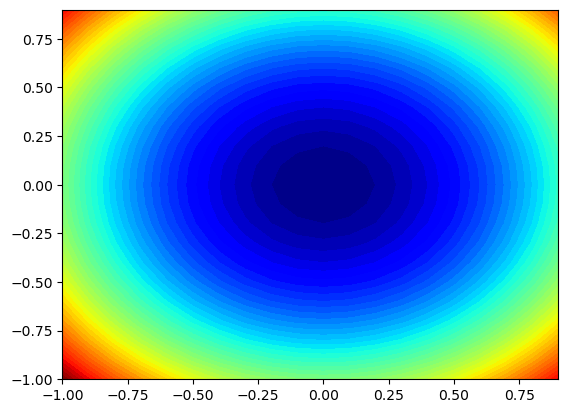

In [5]:

bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

x, y = meshgrid(xaxis, yaxis)

results = objective(x, y)

pyplot.contourf(x, y, results, levels=50, cmap='jet')

pyplot.show()


**Observation**
- The contour plot shows a symmetric bowl-shaped pattern, indicating that the objective function has a minimum point at or near the origin (x = 0, y = 0).
- The color intensity in the plot represents the function's values, with darker regions indicating lower values and lighter regions indicating higher values.





### Step 6: Optimizing the RMSprop

- Calculate the square of the partial derivative and update the decaying average of the squared partial derivatives with the **rho** hyperparameter.
- Use the moving average of the squared partial derivatives and gradient to calculate the step size for the next point.
- We will do this one variable at a time, first calculating the step size for the variable and then the new value for the variable.
- These values are built up in an array until we have a completely new solution that is in the steepest descent direction from the current point, using the custom step sizes.
- This new solution can then be evaluated using the objective() function, and the performance of the search can be reported.



In [6]:
seed(1)

bounds = asarray([[-1.0, 1.0], [-1.0,1.0]])
n_iter = 50
step_size = 0.01
rho = .99

best, score = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
print('Done!')
print('f(%s) = %f' % (best,score))


>0 f([-0.06595602  0.340649  ]) = 0.12039
>1 f([-0.02886236  0.27929536]) = 0.07884
>2 f([-0.01276125  0.23417693]) = 0.05500
>3 f([-0.00562466  0.19863849]) = 0.03949
>4 f([-0.00246486  0.16964301]) = 0.02878
>5 f([-0.00107332  0.145492  ]) = 0.02117
>6 f([-0.00046434  0.12511178]) = 0.01565
>7 f([-0.00019955  0.10776512]) = 0.01161
>8 f([-8.51860635e-05  9.29147925e-02]) = 0.00863
>9 f([-3.61188240e-05  8.01516212e-02]) = 0.00642
>10 f([-1.52095444e-05  6.91533161e-02]) = 0.00478
>11 f([-6.36034309e-06  5.96594573e-02]) = 0.00356
>12 f([-2.64113212e-06  5.14554696e-02]) = 0.00265
>13 f([-1.08894956e-06  4.43619097e-02]) = 0.00197
>14 f([-4.45754295e-07  3.82270235e-02]) = 0.00146
>15 f([-1.81140176e-07  3.29213925e-02]) = 0.00108
>16 f([-7.30678086e-08  2.83339599e-02]) = 0.00080
>17 f([-2.92542666e-08  2.43689933e-02]) = 0.00059
>18 f([-1.16242022e-08  2.09437034e-02]) = 0.00044
>19 f([-4.58359298e-09  1.79863337e-02]) = 0.00032
>20 f([-1.79339171e-09  1.54345976e-02]) = 0.00024
>21

**Observation:**
- The algorithm successfully performs gradient descent using RMSProp with the given parameters, displaying the progress at each iteration. The final result provides the best solution and its corresponding objective function value.